In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [61]:
df_train=pd.read_excel('flight_train.xlsx') # we are loading training data set

In [62]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [63]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [64]:
df_train.dtypes   

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [65]:
df_train.isnull().sum()  # we find two null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [67]:
df_train['Airline'].unique()  #has 12 unique values

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [68]:
df_train['Source'].unique()  #has 5 unique values

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [69]:
df_train['Destination'].unique() #has 6 unique values

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [70]:
df_train['Additional_Info'].unique() #has 10 unique values

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [71]:
df_train.Additional_Info.replace('No Info','No info',inplace=True) # as there are two no info value in column

In [72]:
df_train['Total_Stops'].unique() #has 5 unique values  and there should be maximum of 6 ciies in any particular route 

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [73]:
#Treating the date column

In [74]:
df_train.Date_of_Journey=df_train.Date_of_Journey.str.split('/')

In [75]:
df_train.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [76]:
df_train['Date']=df_train.Date_of_Journey.str[0]
df_train['Month']=df_train.Date_of_Journey.str[1]
df_train['Year']=df_train.Date_of_Journey.str[2]

In [77]:
# splitting of route column  

In [78]:
df_train.Route=df_train.Route.str.split('→')

In [79]:
df_train['City1']=df_train.Route.str[0]  #maximum of six cities in a route
df_train['City2']=df_train.Route.str[1]
df_train['City3']=df_train.Route.str[2]
df_train['City4']=df_train.Route.str[3]
df_train['City5']=df_train.Route.str[4]
df_train['City6']=df_train.Route.str[5]

In [80]:
#treating of Dep_time column   

In [81]:
df_train.Dep_Time=df_train.Dep_Time.str.split(':')# we split the Dep_time column, and create separate columns for departure hours and minutes –

In [82]:
df_train['Dep_Time_Hour']=df_train.Dep_Time.str[0]
df_train['Dep_Time_Min']=df_train.Dep_Time.str[1]

In [83]:
#treating arrival time column

In [84]:
df_train.Arrival_Time=df_train.Arrival_Time.str.split(' ')

In [85]:
df_train['Arrival_date']=df_train.Arrival_Time.str[1]
df_train['Time_of_arrival']=df_train.Arrival_Time.str[0]

In [86]:
df_train['Time_of_arrival']=df_train.Time_of_arrival.str.split(':')
df_train['Arrival_Time_Hour']=df_train.Time_of_arrival.str[0]
df_train['Arrival_Time_Min']=df_train.Time_of_arrival.str[1]

In [87]:
#treating with duration column

In [88]:
df_train.Duration=df_train.Duration.str.split(' ')

In [89]:
df_train['Travel_hours']=df_train.Duration.str[0]
df_train['Travel_hours']=df_train['Travel_hours'].str.split('h')
df_train['Travel_hours']=df_train['Travel_hours'].str[0]
df_train.Travel_hours=df_train.Travel_hours

In [90]:
df_train['Travel_mins']=df_train.Duration.str[1]
df_train.Travel_mins=df_train.Travel_mins.str.split('m')
df_train.Travel_mins=df_train.Travel_mins.str[0]

In [91]:
#treating total stops column
df_train.Total_Stops.replace('non-stop','0',inplace=True)
df_train.Total_Stops=df_train.Total_Stops.str.split(' ')
df_train.Total_Stops=df_train.Total_Stops.str[0]

In [92]:
df_train.isnull().sum()  #due to splitting the columns Nan values are intoduced

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Dep_Time_Hour            0
Dep_Time_Min             0
Arrival_date          6348
Time_of_arrival          0
Arrival_Time_Hour        0
Arrival_Time_Min         0
Travel_hours             0
Travel_mins           1032
dtype: int64

In [93]:
# we drop city4,city5,city6 as they dont contain any data and the columns which we have treated

In [94]:
df_train=df_train.drop(['City4','City5','City6','Route','Date_of_Journey','Dep_Time','Arrival_Time','Duration','Time_of_arrival'],axis=1)

In [95]:
df_train.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
Date                    0
Month                   0
Year                    0
City1                   1
City2                   1
City3                3492
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_mins          1032
dtype: int64

In [96]:
df_train[df_train['City1'].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
9039,Air India,Delhi,Cochin,NaN,No info,7480,6,05,2019,NaN,NaN,NaN,09,45,07,09,25,23,40


In [97]:
df_train['City1'].fillna('DEL',inplace=True)
df_train['City2'].fillna('COK',inplace=True)
df_train['Total_Stops'].fillna(0,inplace=True)

In [98]:
df_train['City3'].fillna('None',inplace=True) #since missing values are less we replace it with separate category

In [99]:
df_train['Arrival_date'].fillna(df_train['Date'],inplace=True)  #arrival date is replaced with departure date
df_train['Travel_mins'].fillna(0,inplace=True)# not usefull data

In [100]:
df_train.isnull().sum()  # no null values are present

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Price                0
Date                 0
Month                0
Year                 0
City1                0
City2                0
City3                0
Dep_Time_Hour        0
Dep_Time_Min         0
Arrival_date         0
Arrival_Time_Hour    0
Arrival_Time_Min     0
Travel_hours         0
Travel_mins          0
dtype: int64

In [101]:
df_train.dtypes

Airline              object
Source               object
Destination          object
Total_Stops          object
Additional_Info      object
Price                 int64
Date                 object
Month                object
Year                 object
City1                object
City2                object
City3                object
Dep_Time_Hour        object
Dep_Time_Min         object
Arrival_date         object
Arrival_Time_Hour    object
Arrival_Time_Min     object
Travel_hours         object
Travel_mins          object
dtype: object

In [102]:
# changing data of numerical type columns from object to int


In [103]:
df_train.Total_Stops=df_train.Total_Stops.astype('int64')
df_train.Date=df_train.Date.astype('int64')
df_train.Month=df_train.Month.astype('int64')
df_train.Year=df_train.Year.astype('int64')
df_train.Dep_Time_Hour=df_train.Dep_Time_Hour.astype('int64')
df_train.Dep_Time_Min=df_train.Dep_Time_Min.astype('int64')
df_train.Arrival_date=df_train.Arrival_date.astype('int64')
df_train.Arrival_Time_Hour=df_train.Arrival_Time_Hour.astype('int64')
df_train.Arrival_Time_Min=df_train.Arrival_Time_Min.astype('int64')
#df_train.Travel_hours=df_train.Travel_hours.astype('int64') #problem with this column
df_train.Travel_mins=df_train.Travel_mins.astype('int64')

In [104]:
df_train[df_train['Travel_hours']=='5m'] #its a wrong data entered as it cant be 5m

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,BOM,GOI,PNQ,16,50,6,16,55,5m,0


In [105]:
df_train.drop(index=6474,inplace=True,axis=0) # we are dropping this row

In [106]:
df_train.Travel_hours=df_train.Travel_hours.astype('int64')

In [107]:
df_train.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Additional_Info      object
Price                 int64
Date                  int64
Month                 int64
Year                  int64
City1                object
City2                object
City3                object
Dep_Time_Hour         int64
Dep_Time_Min          int64
Arrival_date          int64
Arrival_Time_Hour     int64
Arrival_Time_Min      int64
Travel_hours          int64
Travel_mins           int64
dtype: object

In [108]:
categorical=['Airline','Source','Destination','Additional_Info','City1','City2','City3']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Min','Arrival_date','Arrival_Time_Hour','Arrival_Time_Min','Travel_hours','Travel_mins']

In [109]:
#count plots for categorical data


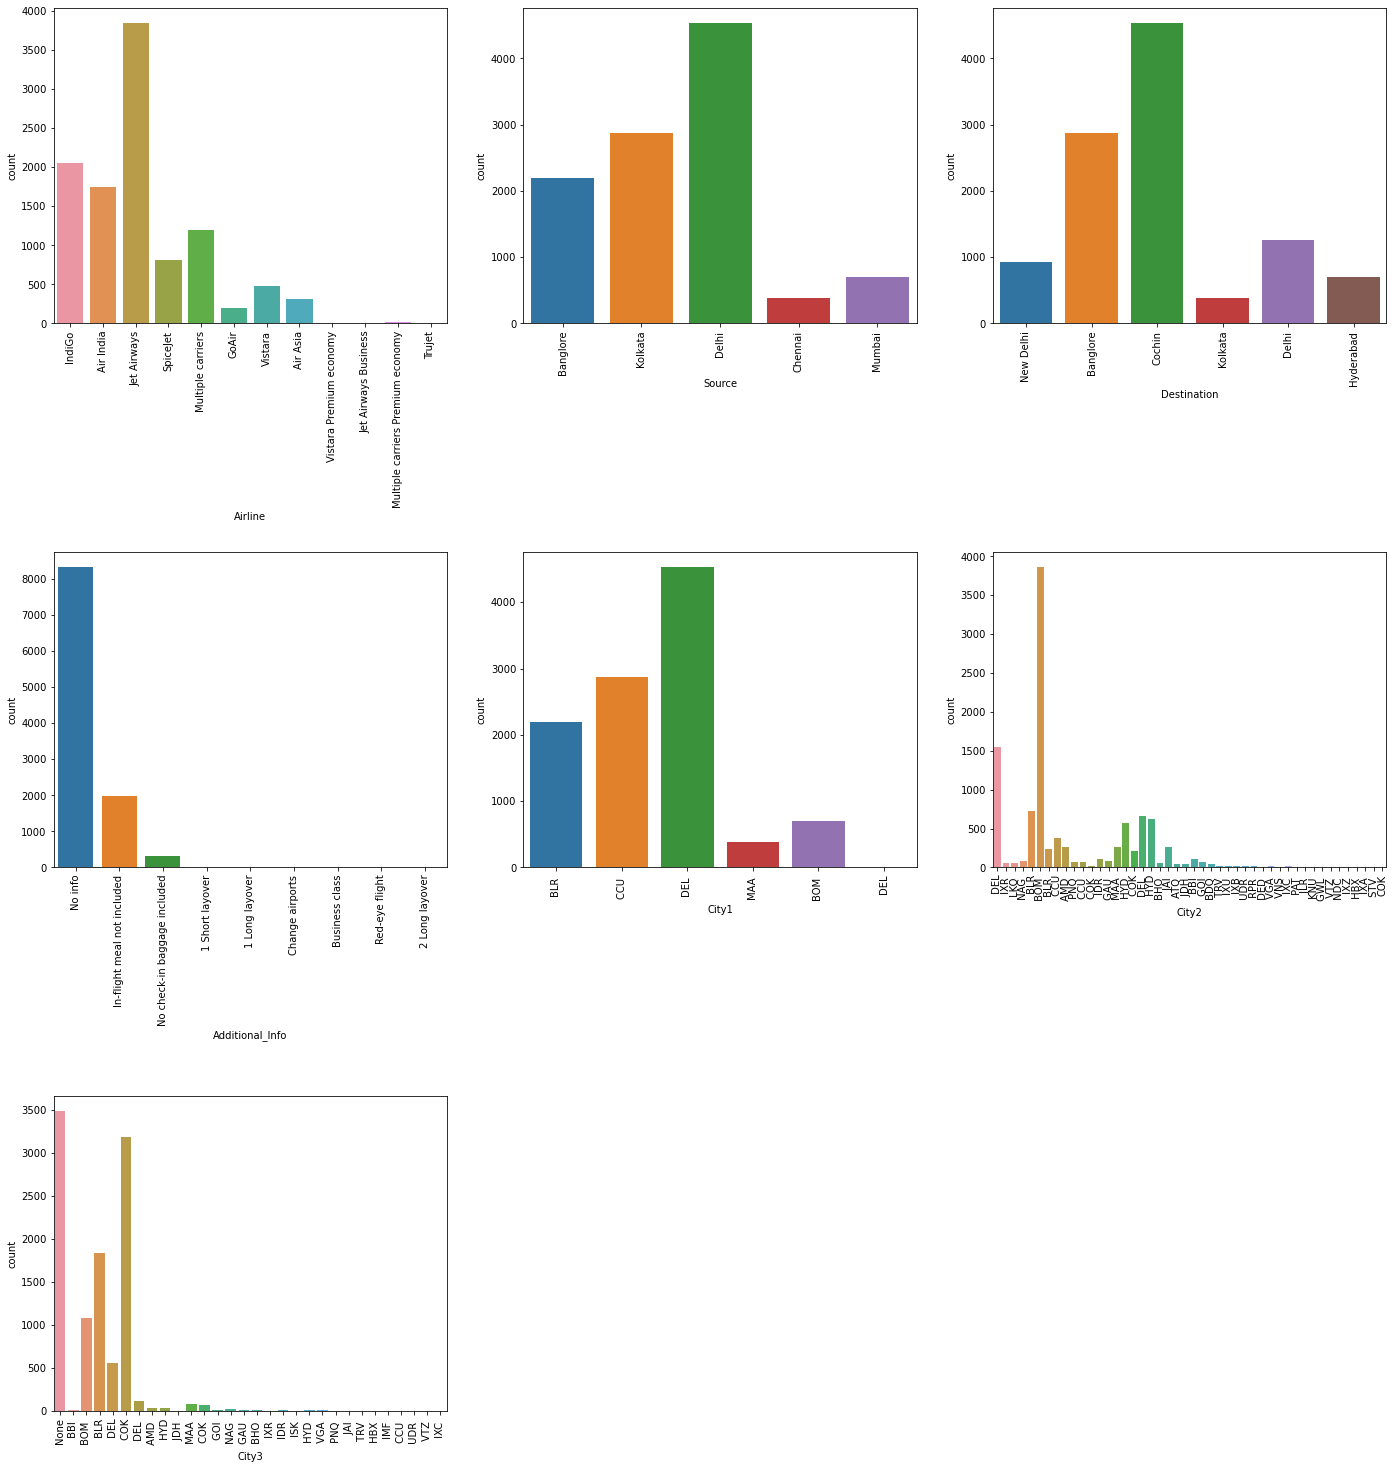

In [110]:
c=1
plt.figure(figsize=(20,43))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(df_train[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
    
plt.show()

In [111]:
# we see source and city1 are same 

In [112]:
#distibution plot

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

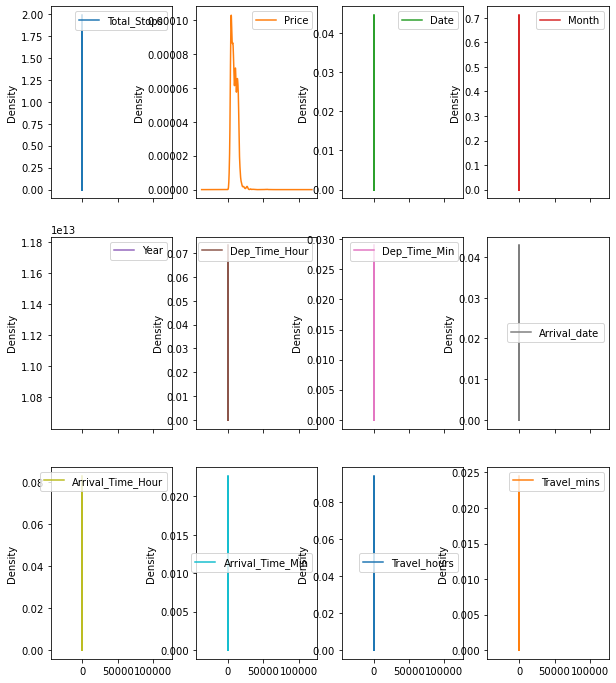

In [113]:
df_train.plot(kind='kde',subplots=True,layout=(3,4),figsize=(10,12))

In [114]:
#year column can be dropped 

<AxesSubplot:xlabel='Price', ylabel='Density'>

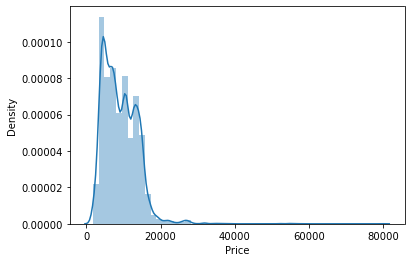

In [115]:
sns.distplot(df_train['Price'])

In [116]:
#price ranges are skewed

In [117]:
#bivariant analysis

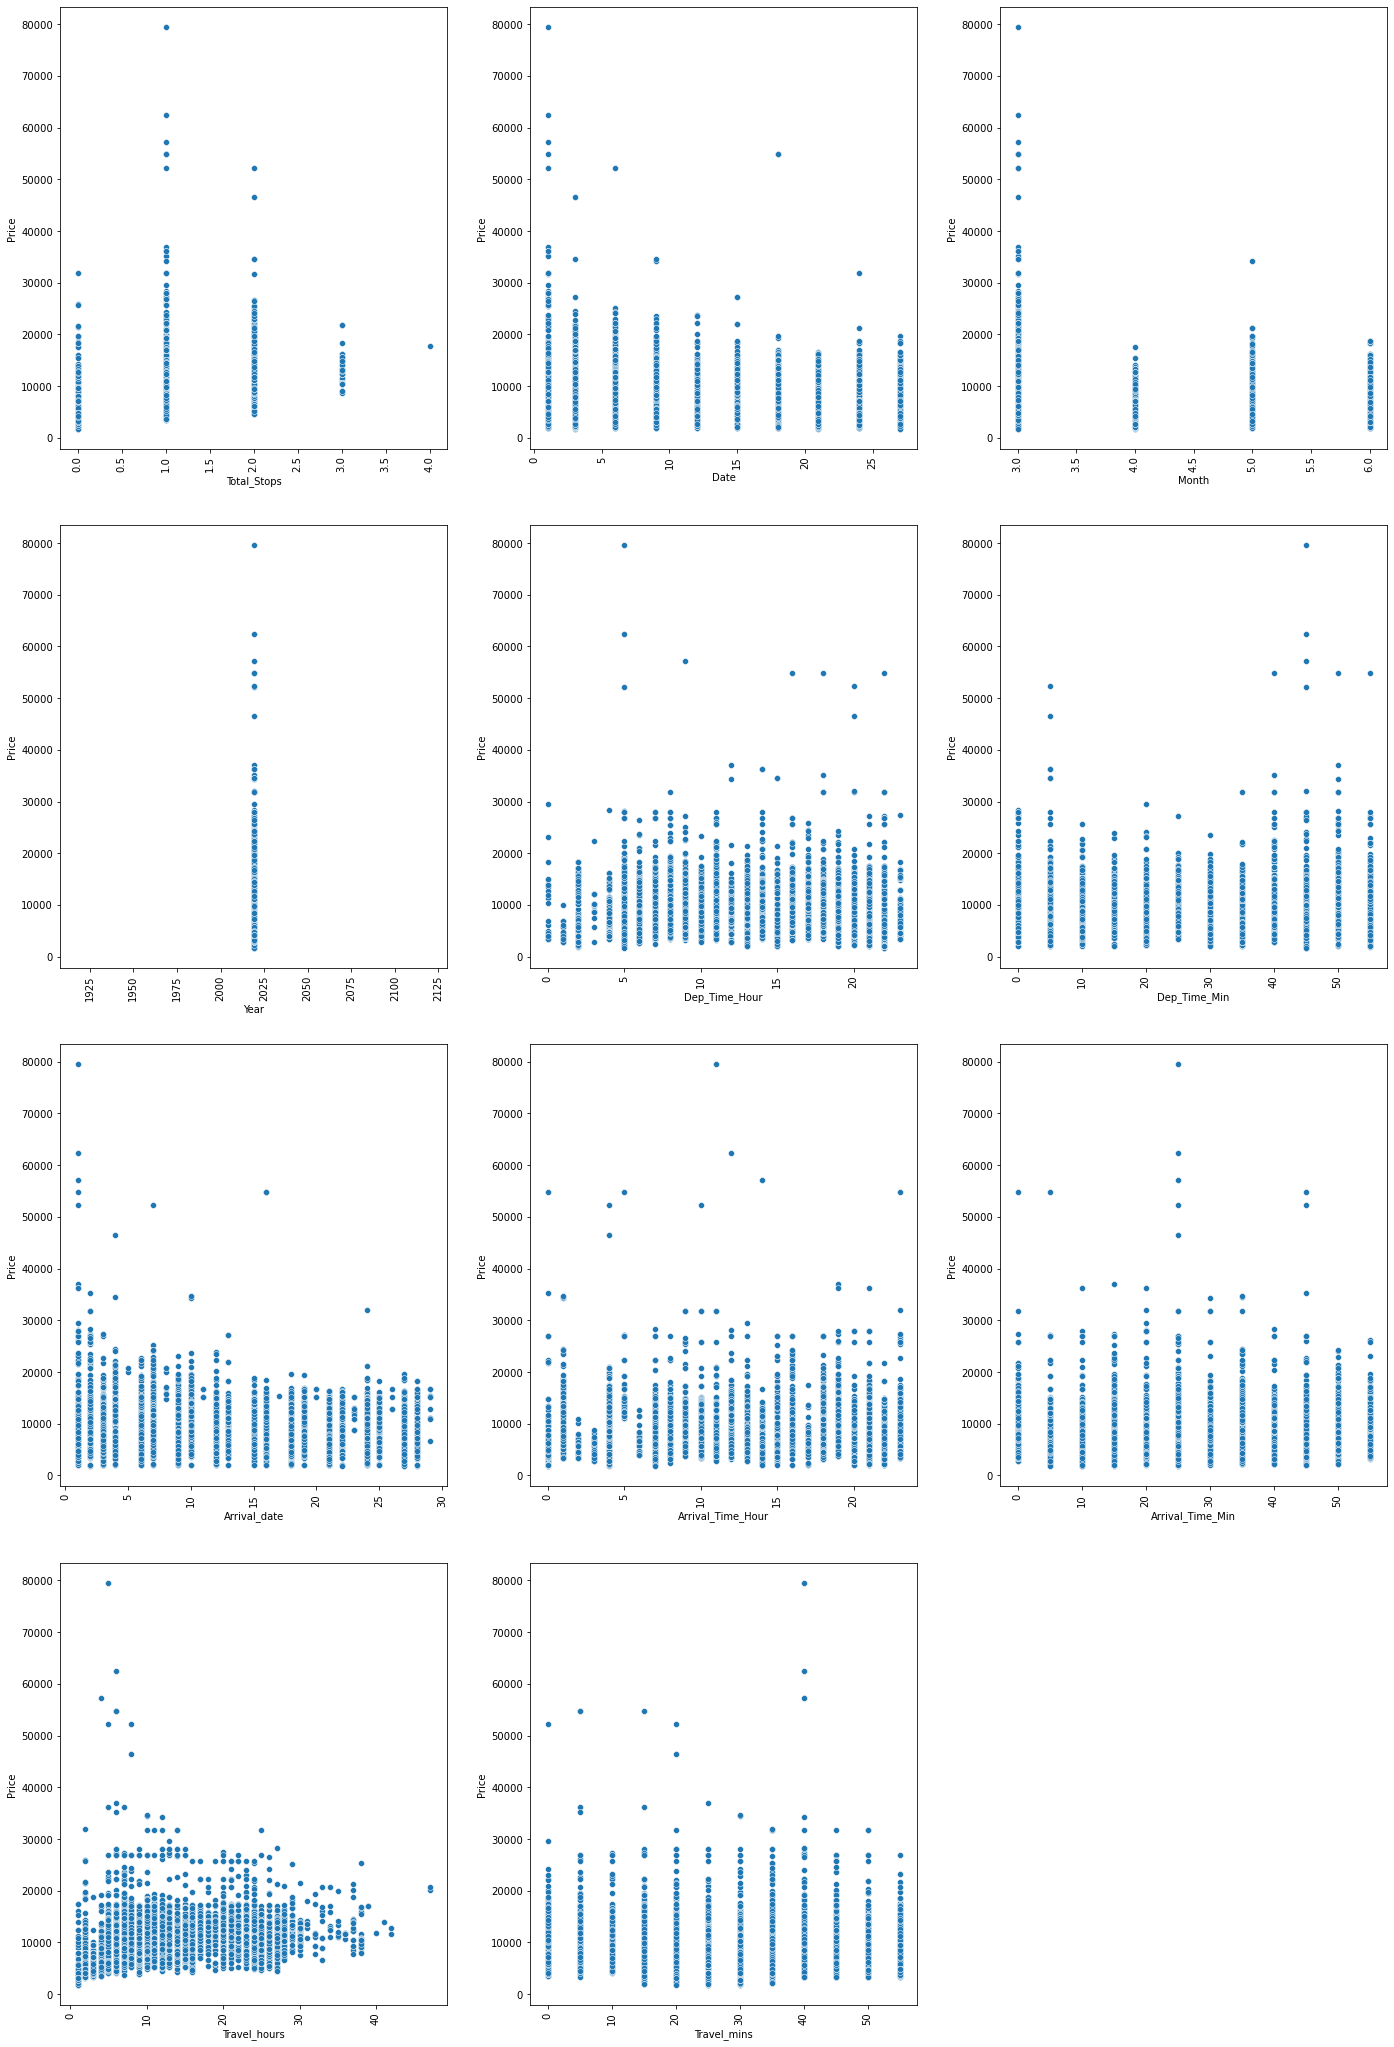

In [118]:
c=1
plt.figure(figsize=(20,43))

for i in numerical:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df_train[i],y=df_train.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
    
plt.show()

In [119]:
#- High price flights are lesser during end of month
# Prices are higher in the month of March
# With increase in travel hours, price increases, but the number of flights decrease.

Checking Outliers

Total_Stops             AxesSubplot(0.125,0.657941;0.168478x0.222059)
Price                AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Date                 AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Month                AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Year                    AxesSubplot(0.125,0.391471;0.168478x0.222059)
Dep_Time_Hour        AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Dep_Time_Min         AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Arrival_date         AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Arrival_Time_Hour          AxesSubplot(0.125,0.125;0.168478x0.222059)
Arrival_Time_Min        AxesSubplot(0.327174,0.125;0.168478x0.222059)
Travel_hours            AxesSubplot(0.529348,0.125;0.168478x0.222059)
Travel_mins             AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

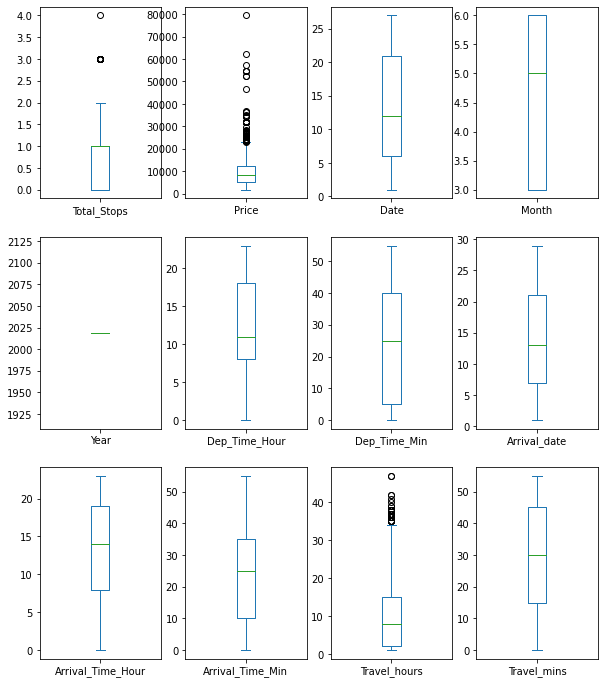

In [120]:
df_train.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,12))

In [121]:
#Outliers are present in Total hours, Total stops and price
# We will not remove outliers from total stops since price is impacted by number of stops
# We will not remove the data with high number of hours, increase in number of hours 

In [122]:
df_train=df_train.drop(['Year','City1','Dep_Time_Min','Arrival_Time_Min','Travel_mins'],axis=1)

In [123]:
#skewness

In [124]:
df_train.skew()

Total_Stops          0.317345
Price                1.813248
Date                 0.118174
Month               -0.387708
Dep_Time_Hour        0.113224
Arrival_date         0.119667
Arrival_Time_Hour   -0.369876
Travel_hours         0.850822
dtype: float64

In [125]:
#remove skewness from travel hour column setting threshold to +/-0.5

In [126]:
df_train.Travel_hours=np.log(df_train.Travel_hours)
df_train.Travel_hours.skew()

-0.26612233332369917

In [127]:
# we have removed skewnes

Label encoding

In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        print(i)
        df_train[i]=le.fit_transform(df_train[i])

Airline
Source
Destination
Additional_Info
City2
City3


In [129]:
df_train   #transformed data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,3,0,5,0,7,3897,24,3,13,29,22,22,1,0.693147
1,1,3,0,2,7,7662,1,5,25,1,5,1,13,1.945910
2,4,2,1,2,7,13882,9,6,32,4,9,10,4,2.944439
3,3,3,0,1,7,6218,12,5,34,3,18,12,23,1.609438
4,3,0,5,1,7,13302,1,3,34,8,16,1,21,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,4107,9,4,5,29,19,9,22,0.693147
10679,1,3,0,0,7,4145,27,4,5,29,20,27,23,0.693147
10680,4,0,2,0,7,7229,27,4,13,29,8,27,11,1.098612
10681,10,0,5,0,7,12648,1,3,13,29,11,1,14,0.693147


In [130]:
df_train.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
Airline,1.000000,-0.013198,0.018607,-0.199061,-0.077741,-0.039318,0.026137,0.024474,-0.061792,0.060289,-0.035125,0.018772,-0.007446,-0.123580
Source,-0.013198,1.000000,-0.592862,0.192593,-0.015940,0.015711,0.005043,0.183551,0.035756,-0.271377,0.058954,0.014608,0.025573,0.123579
Destination,0.018607,-0.592862,1.000000,-0.295651,0.013040,-0.071304,-0.040914,-0.364596,0.077664,0.410010,-0.073045,-0.055461,-0.039751,-0.342835
Total_Stops,-0.199061,0.192593,-0.295651,1.000000,-0.067943,0.603776,-0.009206,0.054603,0.161587,-0.800594,-0.061511,0.018008,0.038151,0.833236
Additional_Info,-0.077741,-0.015940,0.013040,-0.067943,1.000000,-0.063862,-0.012798,-0.045391,0.077008,0.148063,-0.048133,-0.020233,0.031119,-0.162619
Price,-0.039318,0.015711,-0.071304,0.603776,-0.063862,1.000000,-0.153619,-0.103431,-0.087404,-0.591567,0.006718,-0.134527,0.024203,0.614039
Date,0.026137,0.005043,-0.040914,-0.009206,-0.012798,-0.153619,1.000000,-0.038505,-0.025021,0.022748,0.002271,0.997449,-0.003160,-0.023833
Month,0.024474,0.183551,-0.364596,0.054603,-0.045391,-0.103431,-0.038505,1.000000,0.048542,-0.083010,0.039201,-0.034689,-0.003889,0.036121
City2,-0.061792,0.035756,0.077664,0.161587,0.077008,-0.087404,-0.025021,0.048542,1.000000,-0.002803,-0.126378,-0.025472,-0.012478,-0.022022
City3,0.060289,-0.271377,0.410010,-0.800594,0.148063,-0.591567,0.022748,-0.083010,-0.002803,1.000000,0.014851,-0.000736,-0.081905,-0.845992


In [131]:
df_train.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952069,1.435967,0.824003,6.582101,9086.292735,13.509081,4.708762,11.900674,13.232634,12.490358,13.908257,13.348530,1.893002
std,2.352090,1.177110,1.474773,0.675180,0.838102,4610.885695,8.479363,1.164294,8.012732,11.303181,5.748819,8.466780,6.859398,1.014035
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,7.000000,5277.000000,6.000000,3.000000,7.000000,4.000000,8.000000,7.000000,8.000000,0.693147
50%,4.000000,2.000000,1.000000,1.000000,7.000000,8372.000000,12.000000,5.000000,8.000000,6.000000,11.000000,13.000000,14.000000,2.079442
75%,4.000000,3.000000,2.000000,1.000000,7.000000,12373.000000,21.000000,6.000000,14.000000,29.000000,18.000000,21.000000,19.000000,2.708050
max,11.000000,4.000000,5.000000,4.000000,8.000000,79512.000000,27.000000,6.000000,45.000000,29.000000,23.000000,29.000000,23.000000,3.850148


<AxesSubplot:>

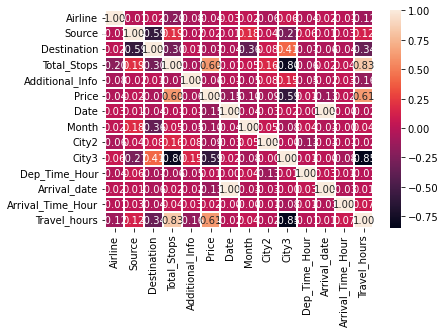

In [132]:
sns.heatmap(df_train.corr(),annot=True,linewidth=2,fmt='.2f')  #correlation matrix

In [133]:
#spliiting data
x=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [134]:
#standard scaler to normalise the data

In [135]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.41080484, -1.65843519,  2.41677843, ...,  0.95574961,
        -1.80031946, -1.18330398],
       [-1.26115217,  0.89029942, -0.97373235, ..., -1.52464819,
        -0.05081299,  0.05217799],
       [ 0.01436882,  0.04072122, -0.29563019, ..., -0.46162056,
        -1.36294284,  1.03693281],
       ...,
       [ 0.01436882, -1.65843519,  0.38247196, ...,  1.54632051,
        -0.3423974 , -0.78343198],
       [ 2.56541078, -1.65843519,  2.41677843, ..., -1.52464819,
         0.09497921, -1.18330398],
       [-1.26115217,  0.04072122, -0.29563019, ..., -0.57973474,
         0.82394024,  0.18386741]])

In [136]:
#fitting the regression model

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [138]:
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'for random state {i},the training accuracy is',{r2_score(y_train,pred_train)})
    print(f'for random state {i} ,the testing accuracy is',{r2_score(y_test, pred_test)})
    print('\n')

for random state 0,the training accuracy is {0.4990592956472729}
for random state 0 ,the testing accuracy is {0.4850529185024449}


for random state 1,the training accuracy is {0.491262835725916}
for random state 1 ,the testing accuracy is {0.5164722954722516}


for random state 2,the training accuracy is {0.494883407783694}
for random state 2 ,the testing accuracy is {0.4994138896536302}


for random state 3,the training accuracy is {0.49217281761109366}
for random state 3 ,the testing accuracy is {0.5126753313681114}


for random state 4,the training accuracy is {0.5004146160140427}
for random state 4 ,the testing accuracy is {0.4795464697358597}


for random state 5,the training accuracy is {0.4982428808853515}
for random state 5 ,the testing accuracy is {0.4881926306886081}


for random state 6,the training accuracy is {0.4942714755137735}
for random state 6 ,the testing accuracy is {0.5005572489235056}


for random state 7,the training accuracy is {0.49213574847232533}
for random 

for random state 67,the training accuracy is {0.4938935350610193}
for random state 67 ,the testing accuracy is {0.5055429443657539}


for random state 68,the training accuracy is {0.49375618544826727}
for random state 68 ,the testing accuracy is {0.5046596403504209}


for random state 69,the training accuracy is {0.48785183249347097}
for random state 69 ,the testing accuracy is {0.5311329222502189}


for random state 70,the training accuracy is {0.5132177132405287}
for random state 70 ,the testing accuracy is {0.42829636362604795}


for random state 71,the training accuracy is {0.5000193190810611}
for random state 71 ,the testing accuracy is {0.4810238873208822}


for random state 72,the training accuracy is {0.49329101600379344}
for random state 72 ,the testing accuracy is {0.5069622914654922}


for random state 73,the training accuracy is {0.49522654849491776}
for random state 73 ,the testing accuracy is {0.4984392330275671}


for random state 74,the training accuracy is {0.506663452

In [139]:
# we see accuracy score is less but training and testing accuracy is same
# checking with other models

In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [141]:
dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()


In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
for i in [dt,svr,knn]:
    i.fit(x_train,y_train)
    pred_train=i.predict(x_train)
    pred_test=i.predict(x_test)
    test_score=r2_score(y_test,pred_test)
    train_score=r2_score(y_train,pred_train)
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('the training accuracy is',{r2_score(y_train,pred_train)})
        print('the testing accuracy is',{r2_score(y_test, pred_test)})
        print('Mean absolute error is',mean_absolute_error(y_test,pred_test))
        print('Mean squared error is',(mean_squared_error(y_test,pred_test,squared=False)))
        print('\n')

SVR()
the training accuracy is {0.06194502678097702}
the testing accuracy is {0.053881139037166514}
Mean absolute error is 3367.7149834491947
Mean squared error is 4472.139013314099


KNeighborsRegressor()
the training accuracy is {0.8514701178124171}
the testing accuracy is {0.8487638347438395}
Mean absolute error is 1069.7295273748246
Mean squared error is 1788.0113575194719




In [143]:
#we get highest accuracy with Kneighbors with r2score of 84%

In [144]:
#ensemble method to improve it

In [145]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
ad=AdaBoostRegressor()

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)
for i in [rfr,ad]:
    i.fit(x_train,y_train)
    pred_train=i.predict(x_train)
    pred_test=i.predict(x_test)
    test_score=r2_score(y_test,pred_test)
    train_score=r2_score(y_train,pred_train)
    if abs(train_score-test_score)<=0.2:
        print(i)
        print('the training accuracy is',{r2_score(y_train,pred_train)})
        print('the testing accuracy is',{r2_score(y_test, pred_test)})
        print('Mean absolute error is',mean_absolute_error(y_test,pred_test))
        print('Mean squared error is',(mean_squared_error(y_test,pred_test,squared=False)))
        print('\n')

RandomForestRegressor()
the training accuracy is {0.975465648023818}
the testing accuracy is {0.850144610320278}
Mean absolute error is 703.490967976442
Mean squared error is 1779.8304327721398


AdaBoostRegressor()
the training accuracy is {0.2568171720424508}
the testing accuracy is {0.21558726187319777}
Mean absolute error is 3395.734787682557
Mean squared error is 4072.065578653501




In [147]:
#using random forest the r2score is increased to 85% but the model is overfitting


In [148]:
#cross Validation

In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
for i in range(2,9):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.8488238295806326
RandomForestRegressor() 0.8496097942832469
RandomForestRegressor() 0.862574324171218
RandomForestRegressor() 0.8733796303572003
RandomForestRegressor() 0.8715510553904631
RandomForestRegressor() 0.8697329481258799
RandomForestRegressor() 0.869381186959021


In [151]:
#HyperParameter tuning

from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[10,20,30,50,60,100],'max_depth':[None,1,2,3]}
gcv=GridSearchCV(rfr,param_grid,cv=3)

In [152]:
re=gcv.fit(x_train,y_train)

In [153]:
re.best_params_

{'max_depth': None, 'n_estimators': 100}

In [154]:
rfr=RandomForestRegressor(max_depth= None, n_estimators= 60)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_dec=rfr.predict(x_test)

rfs=r2_score(y_test,pred_dec)
print('r2_score:',rfs*100)

rfscore=cross_val_score(rfr,x,y,cv=3)
rfc=rfscore.mean()
print('cross val score',rfc*100)

r2_score: 85.0099189844346
cross val score 84.92293676283431


In [155]:
import pickle
filename='flight_price.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [156]:
loadmodel=pickle.load(open('flight_price.pkl','rb'))
result=loadmodel.score(x_test,y_test)
print(result*100)

85.0099189844346


In [157]:
conclusion=pd.DataFrame([loadmodel.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136
predicted,16949.083333,5883.45,9027.7,3662.25,12898.0,9493.369167,16095.9,7255.633333,8644.95,16264.5,...,9777.583333,12455.116667,6435.75,12221.666667,13138.063889,12718.346667,5383.55,6667.95,10057.983333,14120.216667
original,16655.000000,4959.00,9187.0,3858.00,12898.0,10529.000000,16079.0,7229.000000,8085.00,16289.0,...,10844.000000,9732.000000,6442.00,11602.000000,7408.000000,7408.000000,4622.00,7452.00,7060.000000,13731.000000


In [158]:
#the model is working at 85% accuracy

In [159]:
# well load the test file now

In [160]:
df_test=pd.read_excel('test_flight.xlsx') # we are loading training data set

In [161]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [162]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [163]:
df_test.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [164]:
#no null values are present

In [165]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [168]:
df_test['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [170]:
df_test['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [172]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [173]:
#we will treat the data similar to how we have done for training data set

In [ ]:
#treating date of journey

In [174]:
df_test.Date_of_Journey=df_test.Date_of_Journey.str.split('/')

In [175]:
df_test.Date_of_Journey

0        [6, 06, 2019]
1       [12, 05, 2019]
2       [21, 05, 2019]
3       [21, 05, 2019]
4       [24, 06, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 2671, dtype: object

In [176]:
df_test['Date']=df_test.Date_of_Journey.str[0]
df_test['Month']=df_test.Date_of_Journey.str[1]
df_test['Year']=df_test.Date_of_Journey.str[2]

In [177]:
#treating route column


In [185]:
df_test['Total_Stops'].nunique()

5

In [183]:
df_test.Route=df_test.Route.str.split('→')

In [186]:
df_test['City1']=df_test.Route.str[0]  #maximum of six cities in a route
df_test['City2']=df_test.Route.str[1]
df_test['City3']=df_test.Route.str[2]
df_test['City4']=df_test.Route.str[3]
df_test['City5']=df_test.Route.str[4]
df_test['City6']=df_test.Route.str[5]

In [187]:
#treating dep time column

In [188]:
df_test.Dep_Time=df_test.Dep_Time.str.split(':')

In [189]:
df_test['Dep_Time_Hour']=df_test.Dep_Time.str[0]
df_test['Dep_Time_Min']=df_test.Dep_Time.str[1]

In [190]:
#treating arrival time column


In [191]:
df_test.Arrival_Time=df_test.Arrival_Time.str.split(' ')

In [192]:
df_test['Arrival_date']=df_test.Arrival_Time.str[1]
df_test['Time_of_arrival']=df_test.Arrival_Time.str[0]

In [193]:
df_test['Time_of_arrival']=df_test.Time_of_arrival.str.split(':')
df_test['Arrival_Time_Hour']=df_test.Time_of_arrival.str[0]
df_test['Arrival_Time_Min']=df_test.Time_of_arrival.str[1]

In [ ]:
#treating duration column

In [194]:
df_test.Duration=df_test.Duration.str.split(' ')

In [195]:
df_test['Travel_hours']=df_test.Duration.str[0]
df_test['Travel_hours']=df_test['Travel_hours'].str.split('h')
df_test['Travel_hours']=df_test['Travel_hours'].str[0]
df_test.Travel_hours=df_test.Travel_hours

In [196]:
df_test['Travel_mins']=df_test.Duration.str[1]
df_test.Travel_mins=df_test.Travel_mins.str.split('m')
df_test.Travel_mins=df_test.Travel_mins.str[0]

In [197]:
#treating total stops column
df_test.Total_Stops.replace('non-stop','0',inplace=True)
df_test.Total_Stops=df_test.Total_Stops.str.split(' ')
df_test.Total_Stops=df_test.Total_Stops.str[0]

In [198]:
df_test.isnull().sum()  #null values introduced

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Date                    0
Month                   0
Year                    0
City1                   0
City2                   0
City3                 849
City4                2280
City5                2659
City6                2670
Dep_Time_Hour           0
Dep_Time_Min            0
Arrival_date         1605
Time_of_arrival         0
Arrival_Time_Hour       0
Arrival_Time_Min        0
Travel_hours            0
Travel_mins           254
dtype: int64

In [199]:
df_test['Arrival_date'].fillna(df_test['Date'],inplace=True)  #arrival date is replaced with departure date
df_test['Travel_mins'].fillna(0,inplace=True)

In [203]:
df_test['City3'].fillna('None',inplace=True)

In [200]:
df_test=df_test.drop(['City4','City5','City6','Date_of_Journey','Dep_Time','Arrival_Time','Route','Duration','Time_of_arrival'],axis=1)

In [201]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,Jet Airways,Delhi,Cochin,1,No info,6,06,2019,DEL,BOM,COK,17,30,07,04,25,10,55
1,IndiGo,Kolkata,Banglore,1,No info,12,05,2019,CCU,MAA,BLR,06,20,12,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,05,2019,DEL,BOM,COK,19,15,22,19,00,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,21,05,2019,DEL,BOM,COK,08,00,21,21,00,13,0
4,Air Asia,Banglore,Delhi,0,No info,24,06,2019,BLR,DEL,NaN,23,55,25,02,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,No info,6,06,2019,CCU,DEL,BLR,20,30,07,20,25,23,55
2667,IndiGo,Kolkata,Banglore,0,No info,27,03,2019,CCU,BLR,NaN,14,20,27,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1,No info,6,03,2019,DEL,BOM,COK,21,50,07,04,25,6,35
2669,Air India,Delhi,Cochin,1,No info,6,03,2019,DEL,BOM,COK,04,00,6,19,15,15,15


In [204]:
df_test.isnull().sum()  #No null  values

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Date                 0
Month                0
Year                 0
City1                0
City2                0
City3                0
Dep_Time_Hour        0
Dep_Time_Min         0
Arrival_date         0
Arrival_Time_Hour    0
Arrival_Time_Min     0
Travel_hours         0
Travel_mins          0
dtype: int64

In [206]:
df_test.Total_Stops=df_test.Total_Stops.astype('int64')  #changing data type
df_test.Date=df_test.Date.astype('int64')
df_test.Month=df_test.Month.astype('int64')
df_test.Year=df_test.Year.astype('int64')
df_test.Dep_Time_Hour=df_test.Dep_Time_Hour.astype('int64')
df_test.Dep_Time_Min=df_test.Dep_Time_Min.astype('int64')
df_test.Arrival_date=df_test.Arrival_date.astype('int64')
df_test.Arrival_Time_Hour=df_test.Arrival_Time_Hour.astype('int64')
df_test.Arrival_Time_Min=df_test.Arrival_Time_Min.astype('int64')
#df_test.Travel_hours=df_test.Travel_hours.astype('int64') #problem with this column
df_test.Travel_mins=df_test.Travel_mins.astype('int64')

In [207]:
df_test[df_test['Travel_hours']=='5m'] #its a wrong data entered as it cant be 5m

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,City1,City2,City3,Dep_Time_Hour,Dep_Time_Min,Arrival_date,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
2660,Air India,Mumbai,Hyderabad,2,No info,12,3,2019,BOM,GOI,PNQ,16,50,12,16,55,5m,0


In [208]:
df_test.drop(index=2660,inplace=True,axis=0)

In [209]:
df_test.Travel_hours=df_test.Travel_hours.astype('int64')

In [210]:
df_test.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Additional_Info      object
Date                  int64
Month                 int64
Year                  int64
City1                object
City2                object
City3                object
Dep_Time_Hour         int64
Dep_Time_Min          int64
Arrival_date          int64
Arrival_Time_Hour     int64
Arrival_Time_Min      int64
Travel_hours          int64
Travel_mins           int64
dtype: object

In [211]:
df_test=df_test.drop(['Year','City1','Dep_Time_Min','Arrival_Time_Min','Travel_mins'],axis=1) #from train data observation

In [212]:
df_test.skew()  #skewness

Total_Stops          0.321839
Date                 0.199380
Month               -0.404578
Dep_Time_Hour        0.094352
Arrival_date         0.199796
Arrival_Time_Hour   -0.442742
Travel_hours         0.884521
dtype: float64

In [ ]:
#remove skewness with threshold 0f +/-0.5

In [213]:
df_test.Travel_hours=np.log(df_test.Travel_hours)
df_test.Travel_hours.skew()

-0.2976529378192759

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

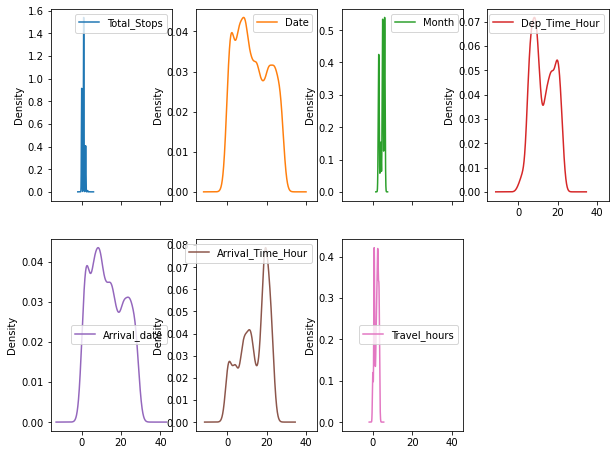

In [214]:
df_test.plot(kind='kde',subplots=True,layout=(3,4),figsize=(10,12))  #to check skewness

In [215]:
#checking Outliers

Total_Stops             AxesSubplot(0.125,0.657941;0.168478x0.222059)
Date                 AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Month                AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Dep_Time_Hour        AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Arrival_date            AxesSubplot(0.125,0.391471;0.168478x0.222059)
Arrival_Time_Hour    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Travel_hours         AxesSubplot(0.529348,0.391471;0.168478x0.222059)
dtype: object

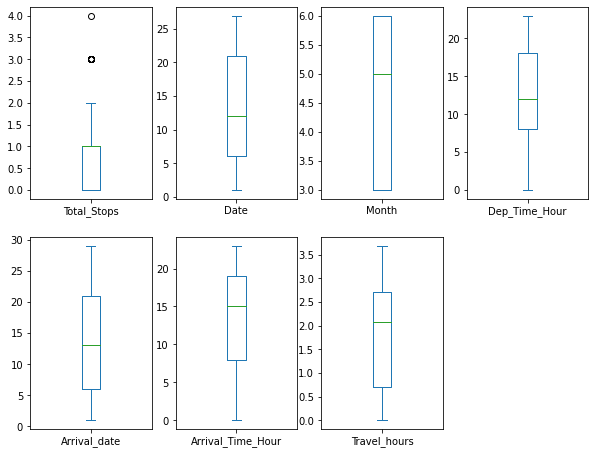

In [216]:
df_test.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,12))

In [217]:
from sklearn.preprocessing import LabelEncoder  #changing object data into int
le=LabelEncoder()

for i in df_test.columns:
    if df_test[i].dtypes == 'object':
        print(i)
        df_test[i]=le.fit_transform(df_test[i])

Airline
Source
Destination
Additional_Info
City2
City3


In [218]:
df_test  #transformed data

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,City2,City3,Dep_Time_Hour,Arrival_date,Arrival_Time_Hour,Travel_hours
0,4,2,1,1,5,6,6,7,5,17,7,4,2.302585
1,3,3,0,1,5,12,5,29,3,6,12,10,1.386294
2,4,2,1,1,3,21,5,7,5,19,22,19,3.135494
3,6,2,1,1,5,21,5,7,5,8,21,21,2.564949
4,0,0,2,0,5,24,6,13,26,23,25,2,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,5,6,6,14,3,20,7,20,3.135494
2667,3,3,0,0,5,27,3,5,26,14,27,16,0.693147
2668,4,2,1,1,5,6,3,7,5,21,7,4,1.791759
2669,1,2,1,1,5,6,3,7,5,4,6,19,2.708050


In [219]:
x1=df_test

In [220]:
from sklearn.preprocessing import StandardScaler #scaling the model
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[ 0.01142395,  0.03322365, -0.2944895 , ..., -0.76597806,
        -1.3613553 ,  0.40386897],
       [-0.42431817,  0.87805355, -0.97584735, ..., -0.15856451,
        -0.50911177, -0.50733323],
       [ 0.01142395,  0.03322365, -0.2944895 , ...,  1.05626258,
         0.76925352,  1.23215262],
       ...,
       [ 0.01142395,  0.03322365, -0.2944895 , ..., -0.76597806,
        -1.3613553 , -0.10411983],
       [-1.2958024 ,  0.03322365, -0.2944895 , ..., -0.88746077,
         0.76925352,  0.80708237],
       [ 0.88290818,  0.03322365, -0.2944895 , ...,  0.20588362,
         0.76925352,  0.73847264]])

In [221]:
#loading training model

In [223]:
loadmodel=pickle.load(open('flight_price.pkl','rb'))

In [224]:
prices=loadmodel.predict(x1)

In [225]:
prices

array([14714.        ,  4430.81666667, 12898.        , ...,
       15765.75      , 14221.16666667,  9834.9925    ])

In [226]:
price_list=pd.DataFrame({'Price':prices})

In [227]:
price_list

,Price
0,14714.000000
1,4430.816667
2,12898.000000
3,12008.217222
4,3777.633333
...,...
2665,8056.250000
2666,4680.375000
2667,15765.750000
2668,14221.166667


In [228]:
#hence we have predicted the pricelist for testing data set

In [229]:
#Hence, we were successfully able to train our regression model ‘Random Forest Regressor’ to predict the flights of prices with an r2_score of 85%, and have achieved it.